In [93]:
from matplotlib import pyplot as plt
import numpy as np
from scipy.ndimage import zoom
import itertools
from math import floor
import nibabel as nib
from skimage.transform import rescale, resize, downscale_local_mean, rotate

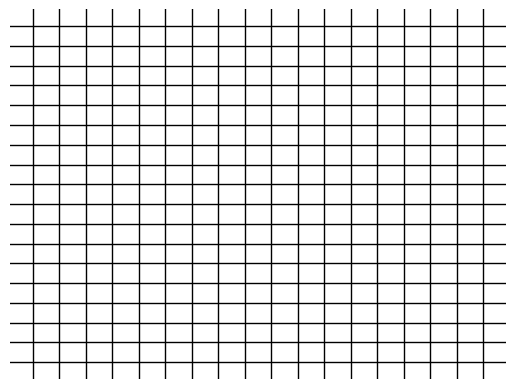

In [177]:
img = nib.load("/groups/ag-reuter/projects/datasets/dHCP/Data/sub-CC00408XX12_ses-125500/T2w_min.nii.gz")
img_d = np.asanyarray(img.dataobj)
slice_d = np.transpose(np.moveaxis(img_d, [0, 1, 2], [1, 2, 0]), (0, 2, 1))[166, 40:220, 50:250]

#plt.imshow(slice_d, cmap="gray")

plt.axis('off')
for i, x in enumerate(range(0, 90, 5)): #[-0.5, 0.5, 1.5, 2.5, 3.5]):
    plt.axvline(x-0.5, color='black', linestyle='-', linewidth=1 if  i in [0, 4] else 1)
    plt.axhline(x-0.5, color='black', linestyle='-', linewidth=1 if  i in [0, 4] else 1)

plt.savefig('grid_90.png')

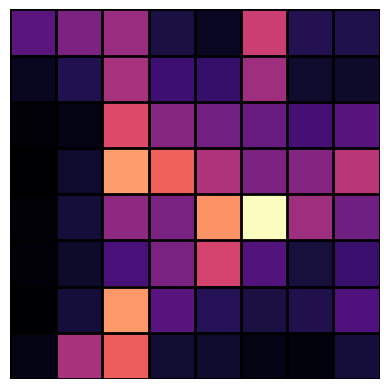

In [152]:
img = nib.load("/groups/ag-reuter/projects/datasets/dHCP/Data/sub-CC00408XX12_ses-125500/T2w_min.nii.gz")
img_d = np.asanyarray(img.dataobj)
slice_d = np.transpose(np.moveaxis(img_d, [0, 1, 2], [1, 2, 0]), (0, 2, 1))[166, 90:150, 117:177]
slice_rotate = rotate(slice_d, angle=-30, preserve_range=True, mode="symmetric") 
slice_resize = resize(slice_rotate, (8, 8),
                       anti_aliasing=True)
#slice_rotate = rotate(slice_resize, angle=-30, preserve_range=True) 
plt.imshow(slice_resize, cmap="magma")

plt.axis('off')
for i, x in enumerate(range(0, 9, 1)): #[-0.5, 0.5, 1.5, 2.5, 3.5]):
    plt.axvline(x-0.5, color='black', linestyle='-', linewidth=2 if  i in [0, 4] else 2)
    plt.axhline(x-0.5, color='black', linestyle='-', linewidth=2 if  i in [0, 4] else 2)

plt.savefig('magma16_alias_rotate_8.png')

In [23]:
data = np.random.uniform(0., 0.8, size=[8, 8])
max_data = data.reshape([2,]*4).min(axis=(1,-1))
interp_data = zoom(data, 3/4)
up_data = np.random.uniform(0, 0.8, size=[2,2])

ValueError: cannot reshape array of size 64 into shape (2,2,2,2)

In [13]:
arg_data = np.ones([4,4])
for i,j in itertools.product(range(0,4), range(0,4)):
    if np.allclose(data[i,j], max_data[floor(i/2), floor(j/2)]):
        arg_data[i,j] = up_data[floor(i/2),floor(j/2)]

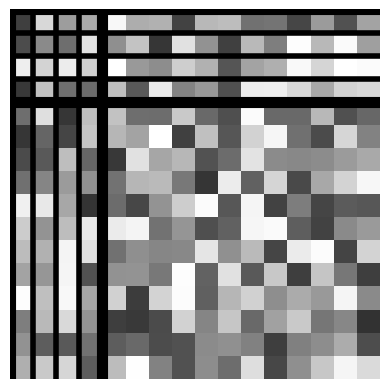

In [11]:
ax = plt.imshow(data, cmap='binary', vmin=0, vmax=1)

plt.axis('off')
for i, x in enumerate([-0.5, 0.5, 1.5, 2.5, 3.5]):
    plt.axvline(x, color='black', linestyle='-', linewidth=8 if  i in [0, 4] else 4)
    plt.axhline(x, color='black', linestyle='-', linewidth=8 if  i in [0, 4] else 4)
    
#plt.savefig('4x4.png')

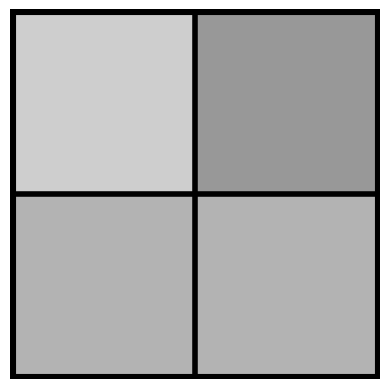

In [8]:
ax = plt.imshow(max_data, cmap='binary', vmin=0, vmax=1)

plt.axis('off')
for i, x in enumerate([-0.5, 0.5, 1.5]):
    plt.axvline(x, color='black', linestyle='-', linewidth=8 if  i in [0, 2] else 4)
    plt.axhline(x, color='black', linestyle='-', linewidth=8 if  i in [0, 2] else 4)

#plt.savefig('maxpool.png')

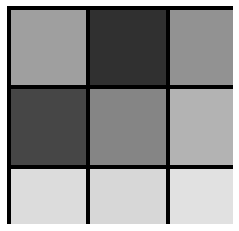

In [21]:
ax = plt.imshow(interp_data, cmap='binary', vmin=0, vmax=1)

plt.axis('off')
for i, x in enumerate([-0.5, 0.5, 1.5, 2.5]):
    plt.axvline(x, color='black', linestyle='-', linewidth=8 if  i in [0, 3] else 4)
    plt.axhline(x, color='black', linestyle='-', linewidth=8 if  i in [0, 3] else 4)
    
    
plt.ylim(-0.2, 2.5)
plt.xlim(-0.5, 2.3)

plt.savefig('interp.png')

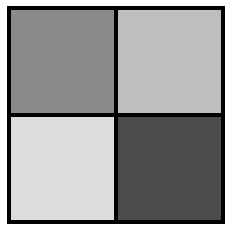

In [18]:
ax = plt.imshow(up_data, cmap='binary', vmin=0, vmax=1)

plt.axis('off')
for i, x in enumerate([-0.5, 0.5, 1.5]):
    plt.axvline(x, color='black', linestyle='-', linewidth=8 if  i in [0, 2] else 4)
    plt.axhline(x, color='black', linestyle='-', linewidth=8 if  i in [0, 2] else 4)
    
plt.savefig('unpool.png')

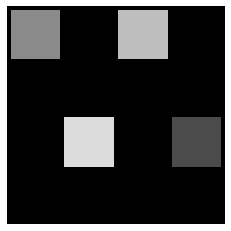

In [19]:
ax = plt.imshow(arg_data, cmap='binary', vmin=0, vmax=1)

plt.axis('off')
for i, x in enumerate([-0.5, 0.5, 1.5, 2.5, 3.5]):
    plt.axvline(x, color='black', linestyle='-', linewidth=8 if  i in [0, 4] else 4)
    plt.axhline(x, color='black', linestyle='-', linewidth=8 if  i in [0, 4] else 4)
    
plt.savefig('unpooled.png')

In [13]:
print(data)
print(data.reshape([2,]*4).min(axis=(1,-1)))
print(data.reshape([2,]*4))

[[0.13847372 0.20092338 0.10466343 0.11944343]
 [0.71291328 0.15257382 0.77560267 0.47583083]
 [0.55217597 0.24536898 0.73117762 0.10737622]
 [0.37770254 0.78204498 0.67184562 0.42870215]]
[[0.13847372 0.10466343]
 [0.24536898 0.10737622]]
[[[[0.13847372 0.20092338]
   [0.10466343 0.11944343]]

  [[0.71291328 0.15257382]
   [0.77560267 0.47583083]]]


 [[[0.55217597 0.24536898]
   [0.73117762 0.10737622]]

  [[0.37770254 0.78204498]
   [0.67184562 0.42870215]]]]
